Artificial Neural Network

Part 1 - Data Preprocessing

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

reate dummy variables

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

 Concatenate the Data Frames

In [4]:
X=pd.concat([X,geography,gender],axis=1)

 Drop Unnecessary columns

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Building the ANN model

Importing the Keras libraries and packages

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Initialising the ANN

In [10]:
classifier = Sequential()

Adding the input layer and the first hidden layer

In [15]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

Adding the second hidden layer

In [17]:
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

Compiling the ANN

In [22]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting the ANN to the Training set

In [23]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3454 - accuracy: 0.8590 - val_loss: 0.3668 - val_accuracy: 0.8444
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3368 - accuracy: 0.8633 - val_loss: 0.3631 - val_accuracy: 0.8466
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3480 - accuracy: 0.8543 - val_loss: 0.3631 - val_accuracy: 0.8478
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3513 - accuracy: 0.8537 - val_loss: 0.3641 - val_accuracy: 0.8485
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3438 - accuracy: 0.8586 - val_loss: 0.3628 - val_accuracy: 0.8493
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3467 - accuracy: 0.8582 - val_loss: 0.3642 - val_accuracy: 0.8463
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3433 - accuracy: 0.8578 - val_loss: 0.3616 - val_accuracy: 0.8493

Epoch 58/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3260 - accuracy: 0.8629 - val_loss: 0.3575 - val_accuracy: 0.8527
Epoch 59/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3247 - accuracy: 0.8624 - val_loss: 0.3569 - val_accuracy: 0.8531
Epoch 60/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3262 - accuracy: 0.8592 - val_loss: 0.3562 - val_accuracy: 0.8554
Epoch 61/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3296 - accuracy: 0.8627 - val_loss: 0.3560 - val_accuracy: 0.8512
Epoch 62/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3261 - accuracy: 0.8683 - val_loss: 0.3539 - val_accuracy: 0.8531
Epoch 63/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3313 - accuracy: 0.8614 - val_loss: 0.3555 - val_accuracy: 0.8554
Epoch 64/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3328 - accuracy: 0.8618 - val_loss: 0.3570 - val_accuracy:

list all data in history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


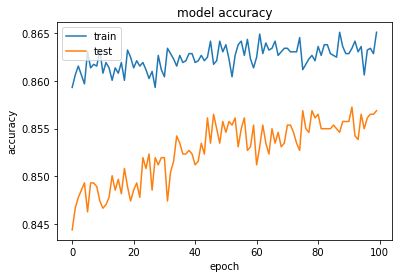

In [30]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

summarize history for loss

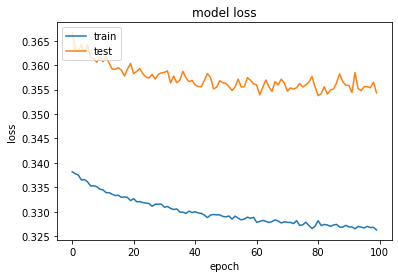

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Part 3 - Making the predictions and evaluating the model

Predicting the Test set results

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Calculate the Accuracy

In [27]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [28]:
score

0.859

In [29]:
cm


array([[1508,   87],
       [ 195,  210]], dtype=int64)